<a href="https://colab.research.google.com/github/ericariyanto/mti/blob/main/computer-vision/PJJ_MTI_1_ComVis_10_Tugas_Multiple_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## YOLO v3

In [1]:
!pip install torch===1.13.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 60.6 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.1.0+cu121
    Uninstalling torch-2.1.0+cu121:
      Successfully uninstalled torch-2.1.0+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu121 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 1.13.1 

In [2]:
!pip install mxnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.2 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [3]:
!pip install gluoncv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.7 MB/s eta 0:00:00


In [4]:
from IPython.display import Image, display
from matplotlib import pyplot as plt

import torch
import mxnet as mx
from gluoncv import model_zoo, data, utils

/usr/local/lib/python3.10/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.1` and `torch==1.13.1+cu117` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [5]:
# Pilih model YOLOv3
def yolo3_detect_image(imageUrl, filename = 'file.jpg') :
  utils.download(imageUrl, filename)
  image = mx.image.imread(filename)
  model = model_zoo.get_model('yolo3_darknet53_coco', pretrained=True)
  # Deteksi objek dalam gambar
  x, img = data.transforms.presets.yolo.load_test(filename, short=512)

  class_IDs, scores, bounding_boxes = model(x)

  # Tampilkan hasil deteksi
  ax = utils.viz.plot_bbox(img, bounding_boxes[0], scores[0], class_IDs[0], class_names=model.classes)

In [6]:
# Baca dan tampilkan gambar untuk deteksi objek
image_url = 'https://www.nyc.gov/html/dot/images/about/flatiron-plaza-manhattan.jpg'
display(Image(url=image_url))

100%|██████████| 557/557 [00:00<00:00, 5908.80KB/s]


100%|██████████| 224190/224190 [00:07<00:00, 29100.27KB/s]


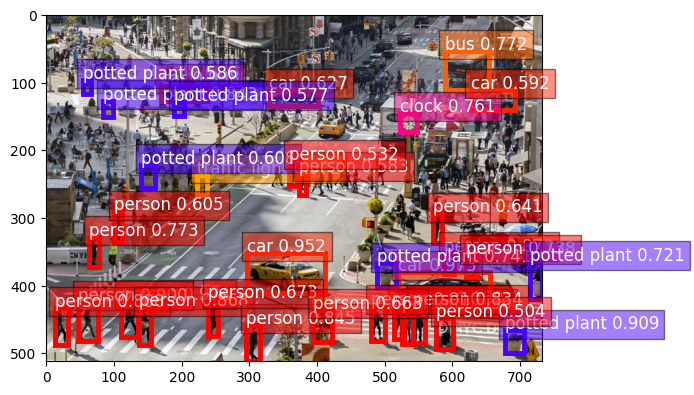

In [7]:
# YoloV3 Result
yolo3_detect_image(image_url, 'street_small.jpg')

## Yolo V8

### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Fri Jan 19 12:20:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!pip install ultralytics==8.0.20

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.8 MB/s eta 0:00:00


In [4]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [7]:
import cv2
import numpy as np
import requests
from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.pyplot as plt

# used for accessing url to download files
import urllib.request as urlreq

# used to access local directory
import os

In [8]:
def get_image_from_url(url, filename="image.jpg") :
  # download picture from url and save locally as filename
  urlreq.urlretrieve(url, filename)
  # read image with openCV
  image = cv2.imread(filename)

  return image

def show_image(img, cmap=None):
  # plot image with matplotlib package
  plt.imshow(img, cmap=cmap)
  plt.axis('off')
  plt.show()

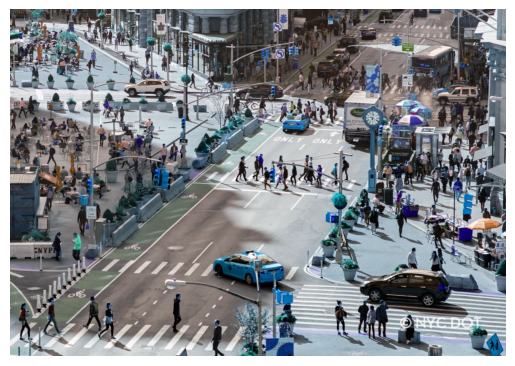

In [9]:
ori = get_image_from_url('https://www.nyc.gov/html/dot/images/about/flatiron-plaza-manhattan.jpg')

show_image(ori)

In [10]:
%cd {HOME}

!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://www.nyc.gov/html/dot/images/about/flatiron-plaza-manhattan.jpg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 103MB/s]

2024-01-19 12:23:17.368920: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-19 12:23:17.368983: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-19 12:23:17.370270: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-19 12:23:18.412552: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 557k/557k [00:00<0

In [16]:
result = cv2.imread('/content/runs/detect/predict/flatiron-plaza-manhattan.jpg',1)

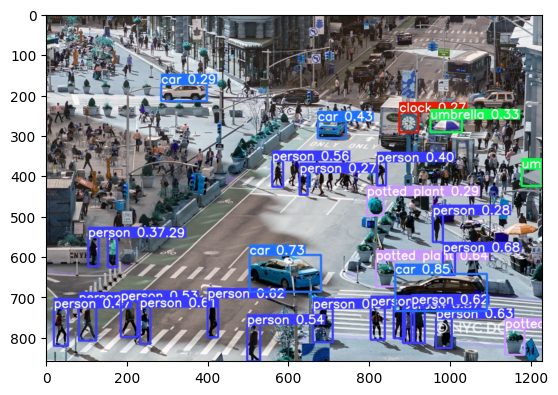

In [17]:
plt.imshow(result)
plt.show()

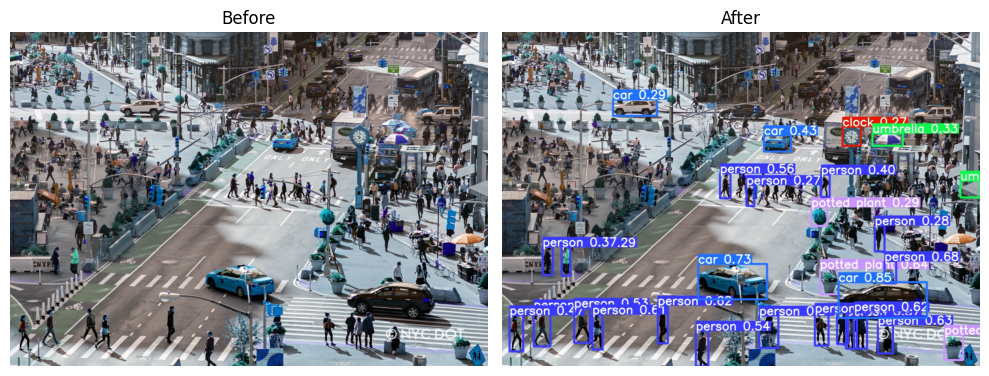

In [18]:
# Tata letak visual dengan dua gambar
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Satu baris, dua kolom

# Tampilkan gambar sebelum
axes[0].imshow(ori)
axes[0].set_title('Before')
axes[0].axis('off')  # Sembunyikan sumbu

# Tampilkan gambar sesudah
axes[1].imshow(result)
axes[1].set_title('After')
axes[1].axis('off')  # Sembunyikan sumbu

# Tampilkan plot
plt.tight_layout()  # Atur tata letak agar rapi
plt.show()
